# Indicator: Corporate Tax Rate
  <br> *Download and upload bulk data file from [here](https://https://taxfoundation.org/data/all/global/corporate-tax-rates-by-country-2023/)*


In [ ]:
## Imports

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [ ]:
## Load the dataset

corporate_tax_df = pd.read_excel("1980_2023_Corporate_Tax_Rates_Around_the_World_Tax_Foundation.xlsx")
corporate_tax_df.head(10)

,Unnamed: 0,iso_2,iso_3,continent,country,1980,1981,1982,1983,1984,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,AW,ABW,NO,Aruba,NaN,NaN,NaN,NaN,NaN,...,28.0,28.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,22.0
1,2,AF,AFG,AS,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2,3,AO,AGO,AF,Angola,NaN,NaN,NaN,NaN,NaN,...,35.0,30.0,30.0,30.0,30.0,30.0,30.0,25.0,25.0,25.0
3,4,AI,AIA,NO,Anguilla,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,AX,ALA,EU,Aland Islands,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,20.0,20.0,20.0,20.0,20.0,20.0
5,6,AL,ALB,EU,Albania,NaN,NaN,NaN,NaN,NaN,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
6,7,AD,AND,EU,Andorra,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
7,8,AN,ANT,NO,Netherlands Antilles,34.0,34.0,34.0,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,AE,ARE,AS,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
9,10,AR,ARG,SA,Argentina,33.0,33.0,33.0,33.0,33.0,...,35.0,35.0,35.0,35.0,30.0,30.0,30.0,35.0,35.0,35.0


## Data Cleaning

In [ ]:
## Remove unwanted columns, namely: "Unnamed: 0", "iso_2", "continent", "country"
corporate_tax_df = corporate_tax_df.drop(columns=["Unnamed: 0", "iso_2", "continent", "country"])
corporate_tax_df

,iso_3,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.00,28.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,22.00
1,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.00,30.00,30.00,30.00,30.00,30.00,30.00,25.00,25.00,25.00
3,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.00,20.00,20.00,20.00,20.00,20.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
247,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
248,ZAF,42.0,40.0,40.0,42.0,42.0,50.0,50.0,50.0,50.0,...,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,27.00
249,ZMB,48.0,48.0,50.0,45.0,45.0,50.0,50.0,45.0,45.0,...,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,30.00,30.00


In [ ]:
## Rename columns
corporate_tax_df = corporate_tax_df.rename(columns={"iso_3":"CountryCode"})

## Add the Indicator Code and Unit
corporate_tax_df.insert(0, "IndicatorCode", "CRPTAX")
corporate_tax_df.insert(2, "Unit", "Percentage")
corporate_tax_df

,IndicatorCode,CountryCode,Unit,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CRPTAX,ABW,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.00,28.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,22.00
1,CRPTAX,AFG,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
2,CRPTAX,AGO,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.00,30.00,30.00,30.00,30.00,30.00,30.00,25.00,25.00,25.00
3,CRPTAX,AIA,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,CRPTAX,ALA,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.00,20.00,20.00,20.00,20.00,20.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,CRPTAX,XKX,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
247,CRPTAX,YEM,Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
248,CRPTAX,ZAF,Percentage,42.0,40.0,40.0,42.0,42.0,50.0,50.0,...,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,27.00
249,CRPTAX,ZMB,Percentage,48.0,48.0,50.0,45.0,45.0,50.0,50.0,...,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,30.00,30.00


In [ ]:
## Checking that all corporate tax rate values are stored as floats, not strings.

corporate_tax_values = corporate_tax_df.iloc[:, 3:]
result = corporate_tax_values.applymap(lambda x: isinstance(x, float))
result.all().all()

<ipython-input-30-69fb83e88d60>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



True

In [ ]:
## Melt dataframe to convert to long format

corporate_tax_rates = pd.melt(corporate_tax_df, id_vars=["IndicatorCode", "CountryCode","Unit",], var_name = "Year", value_name="Value")

## Sort the data according to country and year
corporate_tax_rates = corporate_tax_rates.sort_values(by=["CountryCode","Year"]).reset_index(drop=True)

## Reorder columns
corporate_tax_rates = corporate_tax_rates.iloc[:, [0,1,3,4,2]]

## Fill null values with "NaN"
corporate_tax_rates_final = corporate_tax_rates.fillna("NaN")
corporate_tax_rates_final

<ipython-input-31-c51efcbb3548>:12: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,IndicatorCode,CountryCode,Year,Value,Unit
0,CRPTAX,ABW,1980,NaN,Percentage
1,CRPTAX,ABW,1981,NaN,Percentage
2,CRPTAX,ABW,1982,NaN,Percentage
3,CRPTAX,ABW,1983,NaN,Percentage
4,CRPTAX,ABW,1984,NaN,Percentage
...,...,...,...,...,...
11039,CRPTAX,ZWE,2019,25.75,Percentage
11040,CRPTAX,ZWE,2020,24.72,Percentage
11041,CRPTAX,ZWE,2021,24.72,Percentage
11042,CRPTAX,ZWE,2022,24.72,Percentage


In [ ]:
## Export the cleaned bulk data in dictionary format

corporate_tax_rates_final.to_json('corporate_tax_rates.json', orient="records", indent=4)

## EDA & Visualizations

In [ ]:
## To simplify visualizations, we will only consider countries in the SSPI.

countries = ["ARG", "AUS", "AUT", "BEL", "BRA", "CAN", "CHL", "CHN", "COL", "DNK", "EST", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IND", "IDN", "IRL", "ISR", "ITA", "JPN", "KWT", "LVA", "LTU", "LUX", "MEX", "NLD", "NZL", "NOR", "POL", "PRT", "KOR", "RUS", "SAU", "SGP", "SVN", "ZAF", "ESP", "SWE", "CHE", "ARE", "URY", "CZE", "SVK", "TUR", "GBR", "USA", "BHR", "QAT"]
corporate_tax_rates = corporate_tax_rates[corporate_tax_rates["CountryCode"].isin(countries)]
corporate_tax_rates

,IndicatorCode,CountryCode,Year,Value,Unit
352,CRPTAX,ARE,1980,0.0,Percentage
353,CRPTAX,ARE,1981,0.0,Percentage
354,CRPTAX,ARE,1982,0.0,Percentage
355,CRPTAX,ARE,1983,0.0,Percentage
356,CRPTAX,ARE,1984,0.0,Percentage
...,...,...,...,...,...
10951,CRPTAX,ZAF,2019,28.0,Percentage
10952,CRPTAX,ZAF,2020,28.0,Percentage
10953,CRPTAX,ZAF,2021,28.0,Percentage
10954,CRPTAX,ZAF,2022,28.0,Percentage


#### Filling NaN values
Corporate tax rates are typically discrete and policy-driven, so they tend to remain fixed over certain periods in the short-run, and are changed abruptly whenever new policy decisions arise, as opposed to undergoing gradual or incremental adjustments as we might see in a continuous time series.

Hence, to impute NaN values, I will just fill missing values backwards. If consecutive NaNs exceed 5, I will then use linear interpolation to impute those values, because it is unlikely that the country's corporate tax rate would remain the same for so long, and I can't think of any better ways to do this!

In [ ]:
## Fill NaN values
corporate_tax_rates["Value"] = corporate_tax_rates["Value"].bfill(limit=5)
corporate_tax_rates["Value"] = corporate_tax_rates["Value"].interpolate(method="linear",limit_direction="both")
corporate_tax_rates

<ipython-input-38-22b90d36d747>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-22b90d36d747>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,IndicatorCode,CountryCode,Year,Value,Unit
352,CRPTAX,ARE,1980,0.0,Percentage
353,CRPTAX,ARE,1981,0.0,Percentage
354,CRPTAX,ARE,1982,0.0,Percentage
355,CRPTAX,ARE,1983,0.0,Percentage
356,CRPTAX,ARE,1984,0.0,Percentage
...,...,...,...,...,...
10951,CRPTAX,ZAF,2019,28.0,Percentage
10952,CRPTAX,ZAF,2020,28.0,Percentage
10953,CRPTAX,ZAF,2021,28.0,Percentage
10954,CRPTAX,ZAF,2022,28.0,Percentage


In [ ]:
## Pivot the dataframe so that it's easier to plot by country

corporate_tax_rates_pivot = corporate_tax_rates.pivot(index="Year", columns="CountryCode", values="Value")
corporate_tax_rates_pivot

CountryCode,ARE,ARG,AUS,AUT,BEL,BHR,BRA,CAN,CHE,CHL,...,RUS,SAU,SGP,SVK,SVN,SWE,TUR,URY,USA,ZAF
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.0,33.0,46.0,55.0,48.00,0.0,35.0,50.92,33.048270,48.6,...,19.166667,45.0,40.0,37.0,21.75,57.8,18.802222,25.0,49.699000,42.00
1981,0.0,33.0,46.0,55.0,48.00,0.0,35.0,50.92,33.048270,48.6,...,22.333333,45.0,40.0,38.0,22.50,57.8,22.604444,25.0,49.699000,40.00
1982,0.0,33.0,46.0,55.0,48.00,0.0,35.0,49.53,33.048270,48.6,...,25.500000,45.0,40.0,39.0,23.25,57.8,26.406667,25.0,49.699000,40.00
1983,0.0,33.0,46.0,55.0,45.00,0.0,35.0,48.27,33.048270,48.6,...,28.666667,45.0,40.0,40.0,24.00,58.1,30.208889,25.0,49.834000,42.00
1984,0.0,33.0,46.0,55.0,45.00,0.0,35.0,47.63,32.866120,37.0,...,31.833333,45.0,40.0,41.0,24.75,56.6,34.011111,30.0,49.785400,42.00
1985,0.0,33.0,46.0,55.0,45.00,0.0,35.0,49.43,31.866120,23.5,...,35.000000,45.0,40.0,42.0,25.50,56.6,37.813333,30.0,49.785400,50.00
1986,0.0,33.0,49.0,55.0,45.00,0.0,35.0,49.76,31.683971,37.0,...,35.000000,45.0,40.0,43.0,26.25,56.6,41.615556,30.0,49.823200,50.00
1987,0.0,33.0,49.0,55.0,43.00,0.0,35.0,48.58,31.687614,37.0,...,35.000000,45.0,33.0,44.0,27.00,56.6,45.417778,30.0,44.176000,50.00
1988,0.0,33.0,39.0,55.0,43.00,0.0,35.0,41.29,30.594718,32.5,...,35.000000,45.0,33.0,45.0,27.75,56.6,49.220000,30.0,38.593600,50.00


In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Create line traces for each column

data = []

for col in corporate_tax_rates_pivot.columns:
    trace = go.Scatter(
        x=corporate_tax_rates_pivot.index,
        y=corporate_tax_rates_pivot[col],
        mode='lines',
        name=col
    )
    data.append(trace)

# Create the layout
layout = go.Layout(
    title='Corporate Tax Rates over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Corporate Tax Rate (%)'),
    hovermode='closest'  # Enables hover over the nearest point
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the interactive plot
fig.show()

## General Observations
- Corporate tax rates for almost all countries decreased over time, likely due to the effects of globalization and capital mobility + the growing competition to attract FDIs
- Outliers in the data: ARE (UAE)'s corporate tax rates reflected as 0 until 2022 when it reached about 10%. This is because the UAE did not impose corporate tax before 2022!
- Missing data could be the result of unstable governance, conflict, uncertainty in tax administration policies, or human error in collecting data.
- Important to note that some countries' tax regimes may change frequently and if updated information isn't available at the time of publication, the data might be erroneous.
- OECD BEPS 2.0 --> corporate tax rates across the board likely to increase.


Enter the country code: SGP


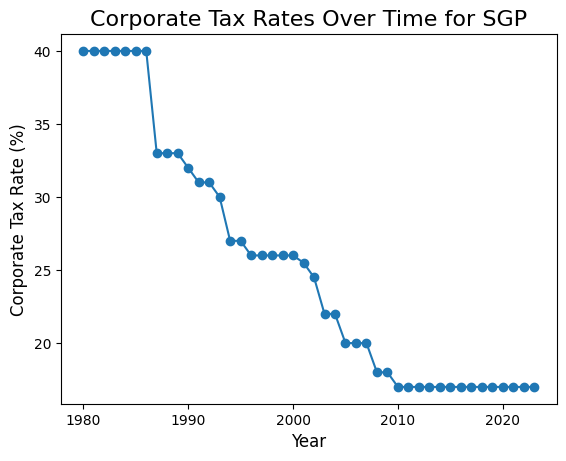

In [ ]:
 ## User Input country

selected_country = input("Enter the country code: ")
country_data = corporate_tax_rates_pivot[selected_country]

plt.plot(corporate_tax_rates_pivot.index, country_data, marker="o")

plt.title(f'Corporate Tax Rates Over Time for {selected_country}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Corporate Tax Rate (%)', fontsize=12)
plt.show()

### Case study about my home country: Singapore (`SGP`)!
- In the 1980s, the Singapore government convened the Economic Committee, which concluded that the nature of Singapore's economy needed to shift up the value chain from manufacturing towards a service-oriented economy to remain competitive amid rising globalization.
- This was also largely in response to the 1985 recession, the first since Singapore's independence.
- Hence, we see a large dip in the corporate tax rates in 1986 to cut production costs and boost FDIs.
- This strategy paid off, and Singapore has continued to lower its corporate tax rate to attract FDIs.
- However, this has raised ethical questions on profit shifting by large MNCs: is Singapore becoming a tax haven catering to these large corporations aggressively strategizing tax incentives?
- Effects of OECD BEPS 2.0



---


## Case Study: Kuwait



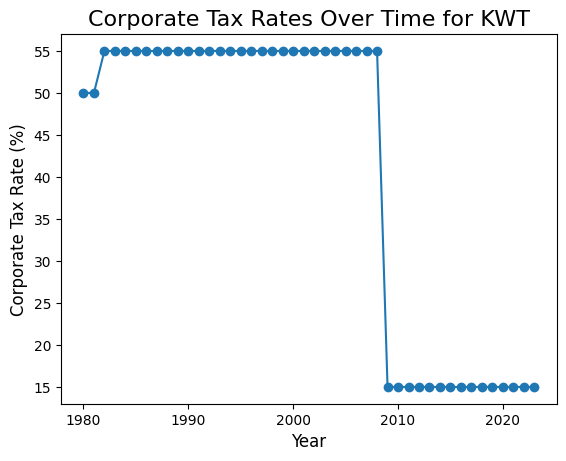

In [ ]:
plt.plot(corporate_tax_rates_pivot.index, corporate_tax_rates_pivot["KWT"], marker="o", label=country)

plt.title(f'Corporate Tax Rates Over Time for KWT', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Corporate Tax Rate (%)', fontsize=12)
plt.show()

**What happened to Kuwait?**
<br> <u> Long-Term Factors </u>
- **Diversification:** Kuwait was experiencing high inflation (a record high of 9.5%) that was largely driven by rising global commodity prices, particularly oil. Corporate tax reduction was seen as a way to develop sectors less vulnerable to external shocks (IMF, 2008).
  - Prevailing 55% corporate tax rate prohibitively disincentivized the inflow of FDIs, especially in sectors beyond the oil industry.
  - Kuwait's economy has traditionally been heavily dependent on oil exports. Hence, a long-term planning goal was to reduce this reliance and develop other sectors further up the value chain like finance, services, etc. (World Bank, 2021)
- **Regional Competition:** Kuwait's neighbors in the Gulf Cooperation Council (GCC) such as Qatar, the UAE and Bahrain had already implemented low or close to zero corporate tax rate policies to attract FDIs. See figure below (World Bank, 2021)
- **Structural Reforms:** The tax cut was part of Kuwait's broader efforts to modernize its legislative and regulatory structure (IMF, 2008). According to the IMF's Article IV Consultation Report, Kuwait introduced laws to ease foreign ownership restrictions, promote public-private partnerships, and even privatized Kuwait Airlines!

<br> <u> Short-Term Factors </u>
- **May 2008 Elections:** A leading theme in the elections was high inflation, so the tax reduction, implemented in Feb 2008, was likely also a political manoeuvre aimed at garnering government support by addressing economic issues just ahead of the elections.




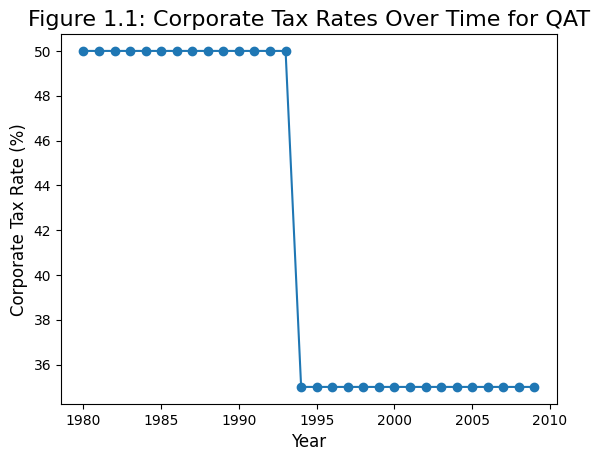

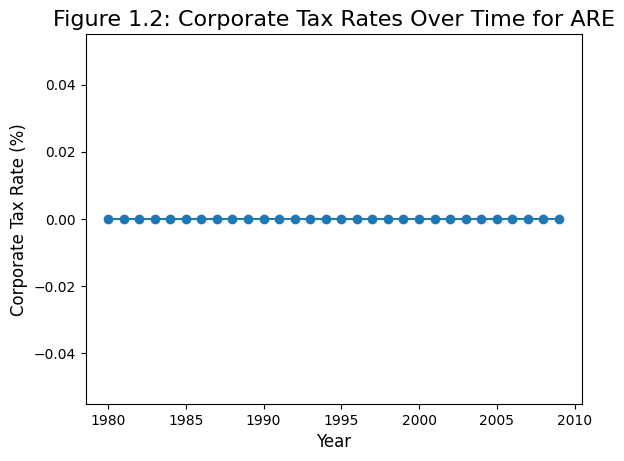

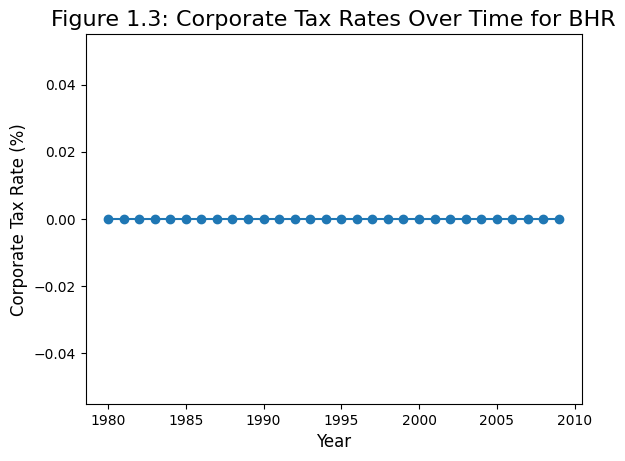

In [ ]:
filtered_gcc = corporate_tax_rates_pivot[corporate_tax_rates_pivot.index <= 2009]
fig_num = 1

for gcc in ["QAT", "ARE", "BHR"]:
  plt.figure()
  plt.plot(filtered_gcc.index, filtered_gcc[gcc], marker="o", label=gcc)
  plt.title(f'Figure 1.{fig_num}: Corporate Tax Rates Over Time for {gcc}', fontsize=16)
  plt.xlabel('Year', fontsize=12)
  plt.ylabel('Corporate Tax Rate (%)', fontsize=12)
  fig_num += 1
  plt

**References**
1. International Monetary Fund. (2008). Kuwait: 2008 Article IV consultation—Staff report; staff statement; public information notice on the Executive Board discussion; and statement by the Executive Director for Kuwait (IMF Country Report No. 08/191). International Monetary Fund. https://www.imf.org/external/pubs/ft/scr/2008/cr08191.pdf
2. KPMG. (2021). Where a foreign company is involved in activities with physical presence or that have an agent in Kuwait. https://assets.kpmg.com/content/dam/kpmg/kw/pdf/TAX/trr/NOL-route2.pdf
3. World Bank. (2023). Kuwait macro poverty outlook: Country-by-country analysis and projections for the developing world (April 2023). https://thedocs.worldbank.org/en/doc/65cf93926fdb3ea23b72f277fc249a72-0500042021/related/mpo-kwt.pdf
